## Imports

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

## Files

In [3]:
def json_file(file: str) -> list[dict]:
    """Récupération des données."""
    with open(file) as f:
        data = json.loads(f.read())
    return data

In [4]:
dataframe_1 = json_file("match_1.json")
df_1 = pd.DataFrame(dataframe_1)

In [5]:
dataframe_2 = json_file("match_2.json")
df_2 = pd.DataFrame(dataframe_1)

In [6]:
df_1.head(30)

,label,norm
0,walk,"[23.177037336396975, 23.36152528524938, 21.535..."
1,walk,"[20.998214383911275, 19.182798059840767, 18.27..."
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554..."
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787..."
4,rest,"[22.069263037713093, 19.672270483203395, 19.88..."
5,walk,"[19.92032356700904, 19.672270483203395, 18.688..."
6,walk,"[72.43782600710844, 29.1545534760874, 51.00451..."
7,walk,"[56.86645792611747, 24.06617147011633, 39.4051..."
8,run,"[34.587473483674074, 33.423278993730264, 21.71..."
9,run,"[10.642204698384765, 27.15560347765402, 40.427..."


In [7]:
len(df_1)

574

## Statistics

In [8]:
modalites_count = df_1.groupby('label').size().reset_index(name='count')
modalites_count

,label,count
0,cross,3
1,dribble,42
2,pass,24
3,rest,25
4,run,209
5,shot,6
6,tackle,20
7,walk,245


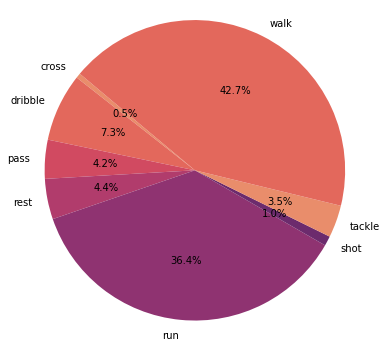

In [9]:
plt.figure(figsize=(6, 6))
sns.set_palette("flare")  # Choisissez une palette de couleurs
plt.pie(modalites_count['count'], labels=modalites_count['label'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Assurez-vous que le cercle est bien circulaire
plt.show()

In [10]:
df_1.insert(2, "norm_mean", "")

In [11]:
df_1["norm_mean"] = df_1["norm"].apply(lambda x: sum(x) / len(x))

In [12]:
df_1

,label,norm,norm_mean
0,walk,"[23.177037336396975, 23.36152528524938, 21.535...",24.166958
1,walk,"[20.998214383911275, 19.182798059840767, 18.27...",26.026276
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554...",23.998177
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787...",22.596573
4,rest,"[22.069263037713093, 19.672270483203395, 19.88...",20.378778
...,...,...,...
569,walk,"[21.245737438782683, 21.938836193196945, 21.24...",23.937046
570,walk,"[20.272347748199333, 21.820302584302983, 21.21...",30.876426
571,run,"[90.21306005395827, 72.12712844635696, 63.5643...",59.019320
572,tackle,"[44.79510251441832, 27.26406867633046, 88.6164...",81.714981


In [13]:
df_1.insert(3, "time", "")

In [14]:
sample_rate = 50
df_1["time"] = df_1["norm"].apply(lambda x: [i / sample_rate for i in range(len(x))])

In [15]:
df_1["time"] = df_1["time"].apply(lambda x: x[-1])

In [16]:
df_1

,label,norm,norm_mean,time
0,walk,"[23.177037336396975, 23.36152528524938, 21.535...",24.166958,1.42
1,walk,"[20.998214383911275, 19.182798059840767, 18.27...",26.026276,1.06
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554...",23.998177,1.34
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787...",22.596573,1.48
4,rest,"[22.069263037713093, 19.672270483203395, 19.88...",20.378778,3.60
...,...,...,...,...
569,walk,"[21.245737438782683, 21.938836193196945, 21.24...",23.937046,1.68
570,walk,"[20.272347748199333, 21.820302584302983, 21.21...",30.876426,0.94
571,run,"[90.21306005395827, 72.12712844635696, 63.5643...",59.019320,0.62
572,tackle,"[44.79510251441832, 27.26406867633046, 88.6164...",81.714981,1.26


In [17]:
df1_grouped = df_1.groupby('label')

In [18]:
df1_stats = df1_grouped['norm_mean'].agg(['max', 'min', 'mean', 'std'])

In [19]:
df1_stats

,max,min,mean,std
label,,,,
cross,52.019396,42.665303,46.708458,4.804188
dribble,95.326573,28.116275,52.882526,16.460026
pass,130.964507,21.791422,64.133278,29.625971
rest,24.683792,20.378778,21.833567,1.269846
run,179.925049,21.346395,54.404593,24.501300
shot,202.130400,54.048415,113.278717,53.640343
tackle,106.758722,31.670862,70.668582,22.835458
walk,50.442922,22.009177,28.094867,4.668603


In [20]:
df1_stats_time = df1_grouped['time'].agg(['max', 'min', 'mean', 'std'])

In [21]:
df1_stats_time

,max,min,mean,std
label,,,,
cross,1.42,0.82,1.180000,0.317490
dribble,1.98,0.14,0.811905,0.337019
pass,1.94,0.04,0.782500,0.478959
rest,4.52,0.42,1.770400,1.179620
run,1.86,0.00,0.746603,0.295447
shot,0.98,0.06,0.536667,0.348119
tackle,1.82,0.50,0.864000,0.358453
walk,3.56,0.38,1.094857,0.365443


After a brief statistical analysis of the data and calculation of the elapsed time for each action, it appears that the "slowest" actions, such as walking or resting, take up the most time.

## Conditions

In [22]:
df_1 = df_1.loc[(df_1['time'] > 0.1) & (df_1['time'] < 3)]

## Preprocessing

In [23]:
df = pd.DataFrame(df_1['norm'].values.tolist(), columns=[f'feature_{i}' for i in range(df_1['norm'].str.len().max())])
df = df.fillna(0)

In [24]:
X = df.values
y = df_1['label'].values
X_tr, X_te, y_tr, y_te = train_test_split( X, y, test_size=0.1, random_state=42, shuffle=True)

Recreating a game from statistical data is a classification problem. The aim is to qualify the player's actions according to acceleration statistics, so as to recreate his trajectory during the game. Several Machine Learning algorithms can be used to solve this classification problem: K-nearest neighbors, neural networks or random forests. It is also possible to use algorithms based on the ensemblistic boosting method: GradientBoosting or AdaBoost.

## Modelling

### K Nearest Neighbors

In [197]:
knn_gs = GridSearchCV(
    KNeighborsClassifier(),
    {
        "n_neighbors": range(2, 15),
        "weights": ["uniform", "distance"],
    }
)

In [198]:
knn_gs.fit(X_tr, y_tr)

c:\Users\as_nn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 15),
                         'weights': ['uniform', 'distance']})

In [199]:
knn_gs.best_params_, knn_gs.best_score_

({'n_neighbors': 8, 'weights': 'distance'}, 0.6418171228887595)

### Neural Network

In [200]:
neurones_gs = GridSearchCV(
    MLPClassifier(),
    {
        "hidden_layer_sizes": [(10,), (50,), (100,), (10, 10,)],
        "activation": ['logistic', 'tanh', 'relu'],
        "alpha": 10.0 ** -np.arange(1, 7)
    }
)

In [201]:
neurones_gs.fit(X_tr, y_tr)

c:\Users\as_nn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\as_nn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\as_nn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\as_nn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warni

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'hidden_layer_sizes': [(10,), (50,), (100,),
                                                (10, 10)]})

In [202]:
neurones_gs.best_params_, neurones_gs.best_score_

({'activation': 'logistic', 'alpha': 1e-05, 'hidden_layer_sizes': (50,)},
 0.6260337798485731)

### AdaBoost

In [28]:
adaboost_gs = GridSearchCV(
    AdaBoostClassifier(),
    {
        'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2],
    }
)

In [29]:
adaboost_gs.fit(X_tr, y_tr)

c:\Users\as_nn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]})

In [30]:
adaboost_gs.best_params_, adaboost_gs.best_score_

({'learning_rate': 0.1, 'n_estimators': 100}, 0.6693069306930693)

### GradientBoosting

In [25]:
gradientboosting_gs = GridSearchCV(
    GradientBoostingClassifier(),
    {
        'n_estimators': [100, 200, 300],  # Nombre d'arbres
        'learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
        'max_depth': [3, 4, 5]
    }
)

In [26]:
gradientboosting_gs.fit(X_tr, y_tr)

c:\Users\as_nn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [27]:
gradientboosting_gs.best_params_, gradientboosting_gs.best_score_

({'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200},
 0.689147738303242)

### Random Forest

In [34]:
forest_gs = GridSearchCV(
    RandomForestClassifier(),
    {
        "n_estimators": range(10, 200, 10),
    }
)

In [35]:
forest_gs.fit(X_tr, y_tr)

c:\Users\as_nn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(10, 200, 10)})

In [36]:
forest_gs.best_params_, forest_gs.best_score_

({'n_estimators': 60}, 0.7166181324014754)

In [39]:
y_pred = forest_gs.best_estimator_.predict(X_te)
y_predListe = y_pred.tolist()
y_teListe = y_te
comparison_df = pd.DataFrame({"Predicted": y_predListe, "Actual": y_teListe})

In [40]:
comparison_df['Actual'] = comparison_df['Actual'].apply(lambda x: re.sub(r'\[|\]', '', str(x)))

In [41]:
comparison_df['Actual'] = comparison_df['Actual'].apply(lambda x: x.replace("'", ''))

In [42]:
comparison_df['Comparison'] = comparison_df['Predicted'] == comparison_df['Actual']

In [43]:
comparison_df

,Predicted,Actual,Comparison
0,run,dribble,False
1,run,run,True
2,walk,walk,True
3,run,run,True
4,walk,walk,True
5,walk,walk,True
6,run,dribble,False
7,walk,walk,True
8,run,run,True
9,walk,run,False


In [47]:
final_df = pd.DataFrame({"label": y_predListe, "norm": X_te.tolist()})

### Final file

In [51]:
new_match = final_df.to_dict(orient='records')

In [53]:
nom_fichier = "new_match.json"

In [54]:
with open(nom_fichier, 'w') as fichier_json:
    json.dump(new_match, fichier_json)

## Description

The algorithm chosen to solve this classification problem is random forest. It allows you to make a choice through a series of questions whose answers
(yes or no) will lead to the final decision. On the tree, each question correspondsa node, i.e. a point where a branch splits in two. Each answerto a question leads us to a certain branch of the tree, and then to the end of the tree.
to an end of the tree, called a leaf, which will contain the answer to our question. The algorithm selects the answer at each node. It then calculates for each feature, the gain in information that would be obtained by selecting that feature.
this one. In order to maximize the information gain, the tree selects the question that maximizes this gain.
this gain.

To begin with, the time for each action has been calculated so that we can perform a conditional filter on these variables later, since the actions must be between 0.1 and 3 seconds.
In addition, to be able to train an algorithm on the data, the 'norm' variable had to be transformed. Lists are not always of equal length. A transformation was therefore performed to obtain a column for each element of each list.
Missing values, for the shortest lists, were processed to obtain the value 0.
Finally, in order to optimize the model's hyperparameters, a GridShearh was performed with the aim of obtaining the best-performing model with the most optimized hyperparameters.